# Learning To Program Cellular Automata With Jax
> A tutorial of fastpages for Jupyter notebooks.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [10]:
!pip install pypng

     |████████████████████████████████| 655kB 2.8MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67161 sha256=006a66b44bd233d6a40cc47b6738b755c4513aa7f8f1952d3cd06d802eea73b7
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [11]:
import png

In [12]:
import io
import numpy as np
import png
def png_bytes(a):
    output = io.BytesIO()
    b = (1 - a)
    png.from_array(b.astype(np.uint8)*255, 'L').write(output)
    return output.getvalue()

In [17]:
import base64
dataurl = b'data:image/png;base64,'+base64.b64encode(png_bytes(np.identity(128)))
#dataurl = b'"'+dataurl + b'"'

b''
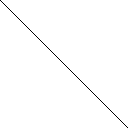

In [18]:
dataurl

alt.Chart(...)
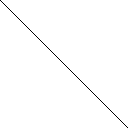

In [22]:
import altair as alt
import pandas as pd

source = pd.DataFrame.from_records([
      {"x": 0.5, "y": 0.5, "img": dataurl.decode("utf-8")},
      {"x": 1.5, "y": 1.5, "img": "https://vega.github.io/vega-datasets/data/gimp.png"},
      {"x": 2.5, "y": 2.5, "img": "https://vega.github.io/vega-datasets/data/7zip.png"}
])

alt.Chart(source).mark_image(
    width=128,
    height=128
).encode(
    x='x',
    y='y',
    url='img'
)